<a href="https://colab.research.google.com/github/JuanJosephG/DS-Resources/blob/main/Power_Supply_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
</br>
<b> Notes: </b> 
</br>
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
</br> </br>
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007. </br>

### Attribute Information:

1.date: Date in format dd/mm/yyyy <br/>
2.time: time in format hh:mm:ss <br/>
3.global_active_power: household global minute-averaged active power (in kilowatt) <br/>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) <br/>
5.voltage: minute-averaged voltage (in volt) <br/>
6.global_intensity: household global minute-averaged current intensity (in ampere) <br/>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). <br/>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. <br/>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner. <br/>



In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

data_path =  'household_power_consumption.txt'
cols_to_use = ['Date', 'Time','Global_active_power']

df_uci = pd.read_csv(data_path, sep=';', usecols=cols_to_use)

C:\Users\jjgue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df_uci.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [ ]:
### Combinando date + time y ubicar nueva columna "datetime"
df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])
df_uci = df_uci.drop(['Date','Time'], axis=1)
df_uci = df_uci.set_index('datetime')

In [ ]:
df_uci.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [ ]:
### Limpieza de datos en el dataset
import numpy as np
df_uci = df_uci.replace('?', np.nan)
df_uci = df_uci.astype(np.float).fillna(method='bfill')

In [ ]:
# For simplication,
# I will resample so that each row
# represents a whole hour
df_uci_hourly = df_uci.resample('H').sum()
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly.index = df_uci_hourly.index.date

In [ ]:
df_uci_hourly

,Global_active_power,hour
2006-12-16,152.024,17
2006-12-16,217.932,18
2006-12-16,204.014,19
2006-12-16,196.114,20
2006-12-16,183.388,21
...,...,...
2010-12-11,143.518,19
2010-12-11,105.200,20
2010-12-11,66.894,21
2010-12-11,19.232,22


In [ ]:
# dataset para visualizacion
df_uci_pivot = df_uci_hourly.pivot(columns='hour')
df_uci_pivot = df_uci_pivot.dropna()

In [ ]:
df_uci_pivot.head()

Global_active_power                                             \
hour                        0        1       2       3        4        5    
2006-12-17             112.948  200.964  95.236  99.732  132.946  119.804   
2006-12-18              16.582   18.798  17.068  18.596   61.580   17.610   
2006-12-19              50.228   21.182  19.634  18.498   19.670   18.400   
2006-12-20              27.590   15.520  47.062  18.602   17.340   15.762   
2006-12-21              92.152   83.878  76.494  18.156   14.804   17.442   

                                               ...                             \
hour            6        7        8        9   ...       14       15       16   
2006-12-17  78.198   97.202  113.434  152.944  ...  125.558  179.124  199.562   
2006-12-18  36.600  147.026  124.928   97.760  ...  103.982  107.058  116.958   
2006-12-19  47.780  107.138  232.742   97.066  ...   18.128   25.282   82.328   
2006-12-20  17.016   91.598  175.056   83.132  ...   77.694   16.868   28.106   
2006-12-21  17.740   76.828   93.782  154.548  ...   61.434   18.444   81.604   

                                                                           
hour             17       18       19       20       21       22       23  
2006-12-17  204.406  221.826  174.504  201.690  182.446   91.080   26.264  
2006-12-18  129.294  144.152  156.870  183.034  130.184  104.328   92.836  
2006-12-19  126.690  132.282  110.526  176.432   86.572   43.200   23.022  
2006-12-20   34.410  170.210  194.918  214.528  218.764  183.538  142.906  
2006-12-21  105.158  146.598  131.828  146.242   58.936   16.816   16.226  

[5 rows x 24 columns]

<AxesSubplot:xlabel='None,hour'>

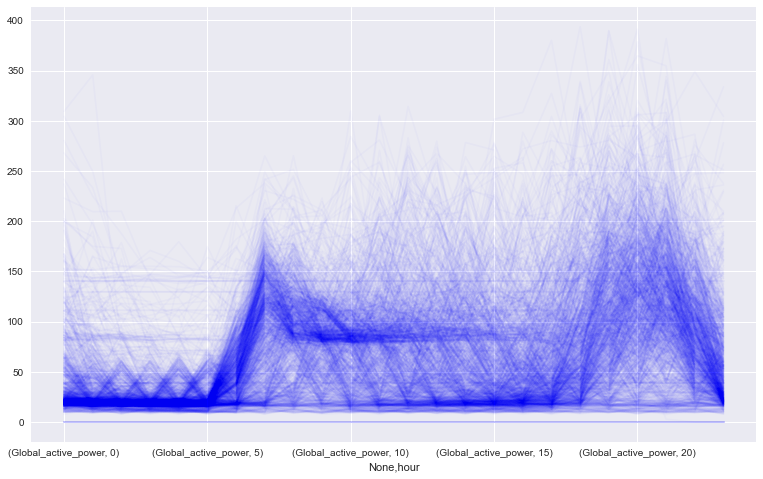

In [ ]:
df_uci_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

The plot above shows all the daily-load profiles of 1456 days plotted together. We can see two clear patterns of consumption behavior by looking at the darker regions (where more curves are concentrated).

### K means analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Experimentando con el numero de cluster 
sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

X = df_uci_pivot.values.copy()

# Very important to scale!
# It is important to scale each period within the same range 
# so that the magnitude of the energy load does not interfere in the selection of the cluster.
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Utilizando el algoritmo no supervisado K-means.
for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

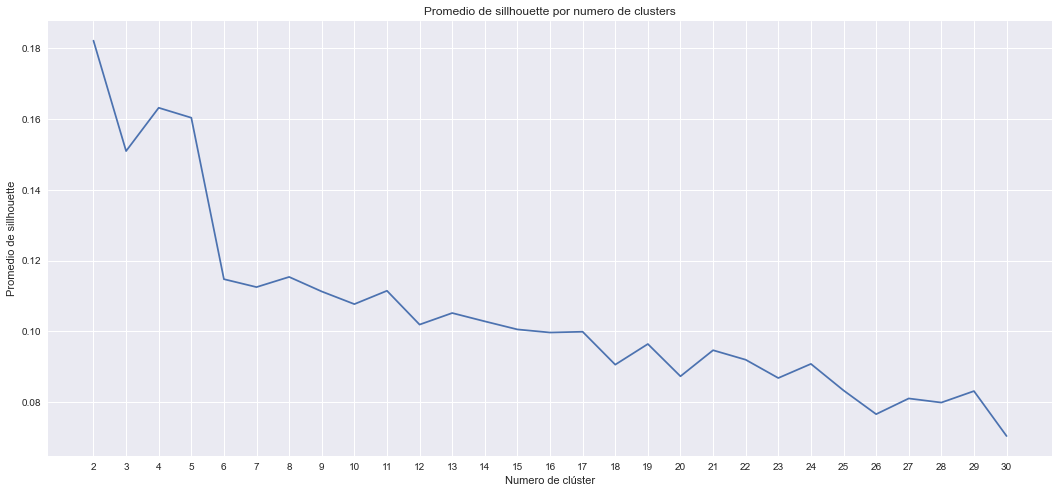

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(n_cluster_list, sillhoute_scores)
plt.xlabel("Numero de clúster")
plt.ylabel("Promedio de sillhouette")
plt.title("Promedio de sillhouette por numero de clusters")
plt.xticks(n_cluster_list)
plt.show()

The maximum average silhouette occurs when there are only 2 clusters, 
but to better illustrate this example, I choose 3. Let’s see how they look:

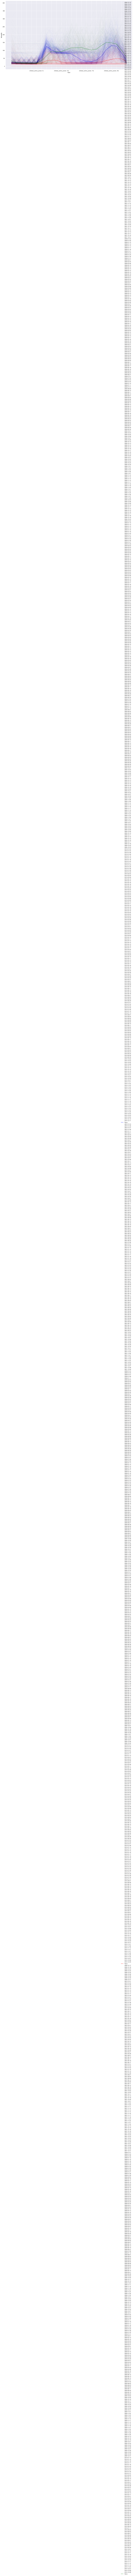

In [ ]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_uci_pivot = df_uci_pivot.set_index(cluster_found_sr, append=True )

fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_uci_pivot.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    df_uci_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_uci_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

The green cluster contains loads that maintain a steady use of energy throughout the afternoon. Maybe these are days where the occupants stayed at home, like weekends and special dates.

The blue cluster has a high peak in the morning, a decline in usage during the afternoon and high again at night. This pattern seems to fit business days when occupants leave for work and/or school.

Finally, the red cluster shows days when consumption is low throughout the whole day. Maybe a case of holidays when only a few appliances are left on?

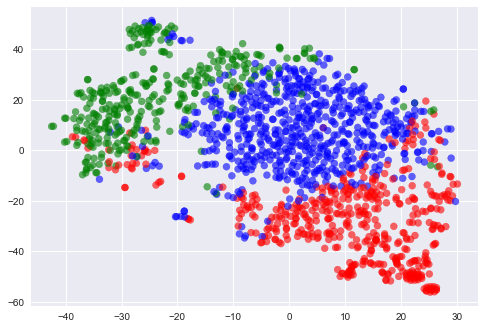

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(X)

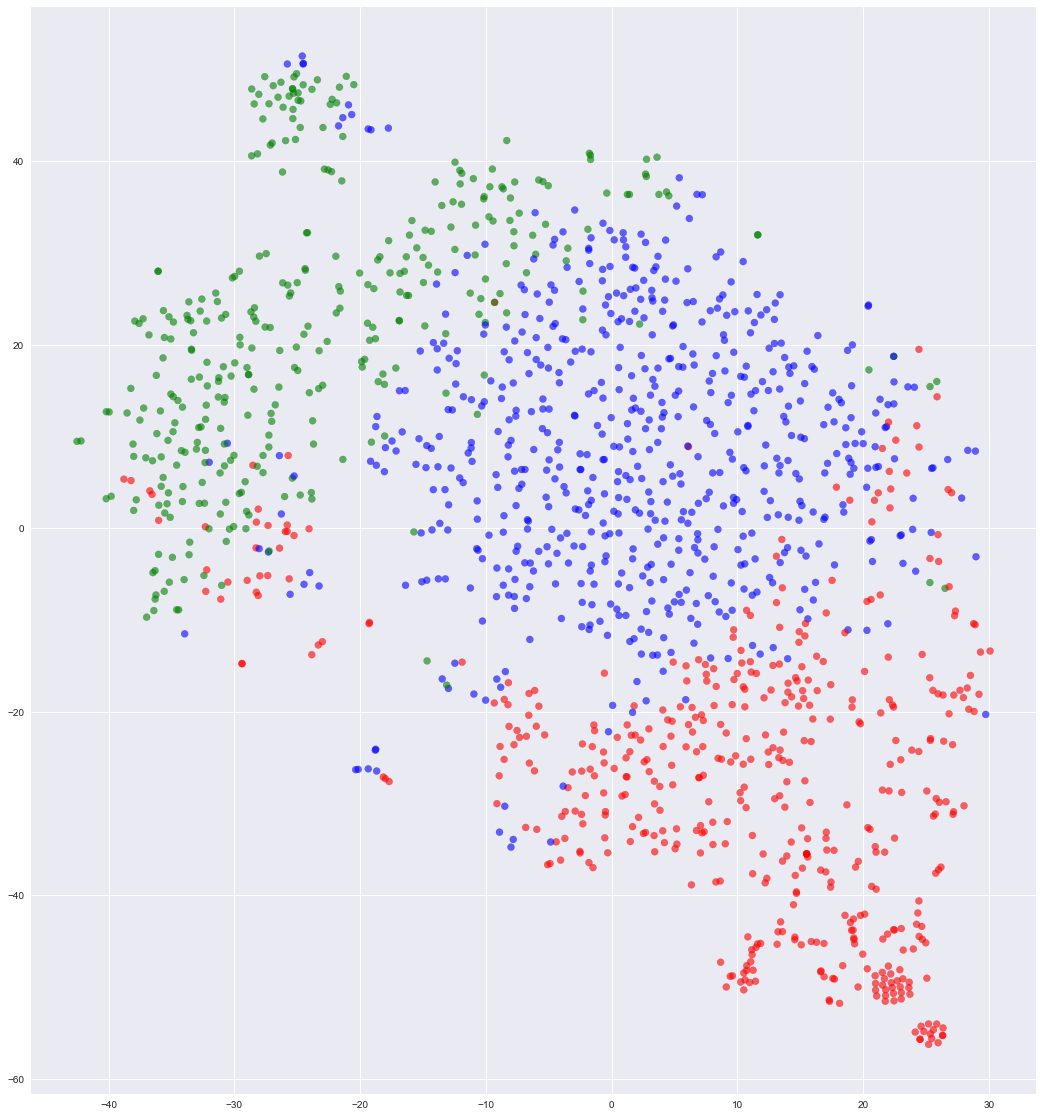

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.figure(figsize=(18,20))
plt.scatter(results_tsne[:,0], results_tsne[:,1],
    c=df_uci_pivot.index.get_level_values('cluster'),
    cmap=cmap, 
    alpha=0.6, 
    )